In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
from scipy.sparse import csr_matrix
import scanpy as sc

sc.set_figure_params(dpi=100, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = './write/zebrafish.h5ad'

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.19.0 scipy==1.5.0 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


In [18]:
adata = sc.read_csv("../datasets/data.csv")

In [19]:
adata

AnnData object with n_obs × n_vars = 26586 × 6026

Filter out data

In [20]:
sc.pp.filter_cells(adata, min_counts=1)

filtered out 238 cells that have less than 1 counts


In [21]:
adata.X = adata.X.astype('float64')  # this is not required and results will be comparable without it

In [22]:
adata.n_obs

26348

In [23]:
adata.var_names

Index(['f6_DEW142_bcHEDY', 'f6_DEW142_bcCYMF', 'f6_DEW142_bcDKSO',
       'f6_DEW142_bcDOVI', 'f6_DEW142_bcFLIX', 'f6_DEW142_bcGCWL',
       'f6_DEW142_bcBZHA', 'f6_DEW142_bcGPEV', 'f6_DEW142_bcGXQD',
       'f6_DEW142_bcCGJS',
       ...
       'f6_DEW148_bcCAGE', 'f6_DEW148_bcFQZF', 'f6_DEW148_bcDBYH',
       'f6_DEW148_bcFDUX', 'f6_DEW148_bcGFQA', 'f6_DEW148_bcBGOT',
       'f6_DEW148_bcHSLU', 'f6_DEW148_bcGVHN', 'f6_DEW148_bcIDUV',
       'f6_DEW148_bcFIKY'],
      dtype='object', length=6026)

In [24]:
sc.pp.filter_genes(adata, min_counts=1)

In [25]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:03)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:14)


In [27]:
sc.tl.pca(adata)

computing PCA
    with n_comps=50
    finished (0:00:15)


In [29]:
adata.write(results_file)

In [30]:
adata = sc.read(results_file)

In [32]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50


/Users/reang/anaconda3/envs/compbio/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)


In [33]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:05:44)


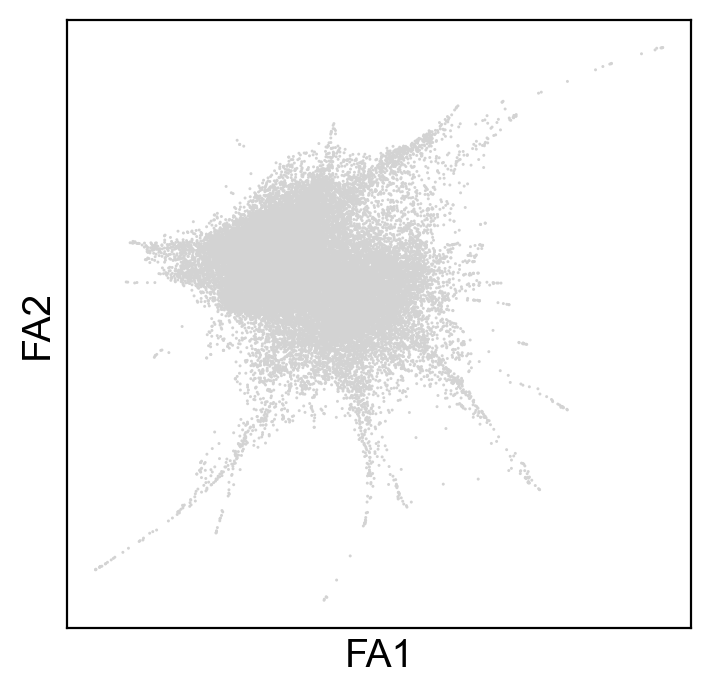

In [41]:
sc.pl.draw_graph(adata)

In [42]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9939399  0.9911475  0.98903143 0.98805124 0.98677427
     0.9838745  0.980895   0.9779515  0.9773208  0.97715944 0.9770726
     0.9768949  0.9760931  0.97587556]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:02)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)


In [43]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:25:35)


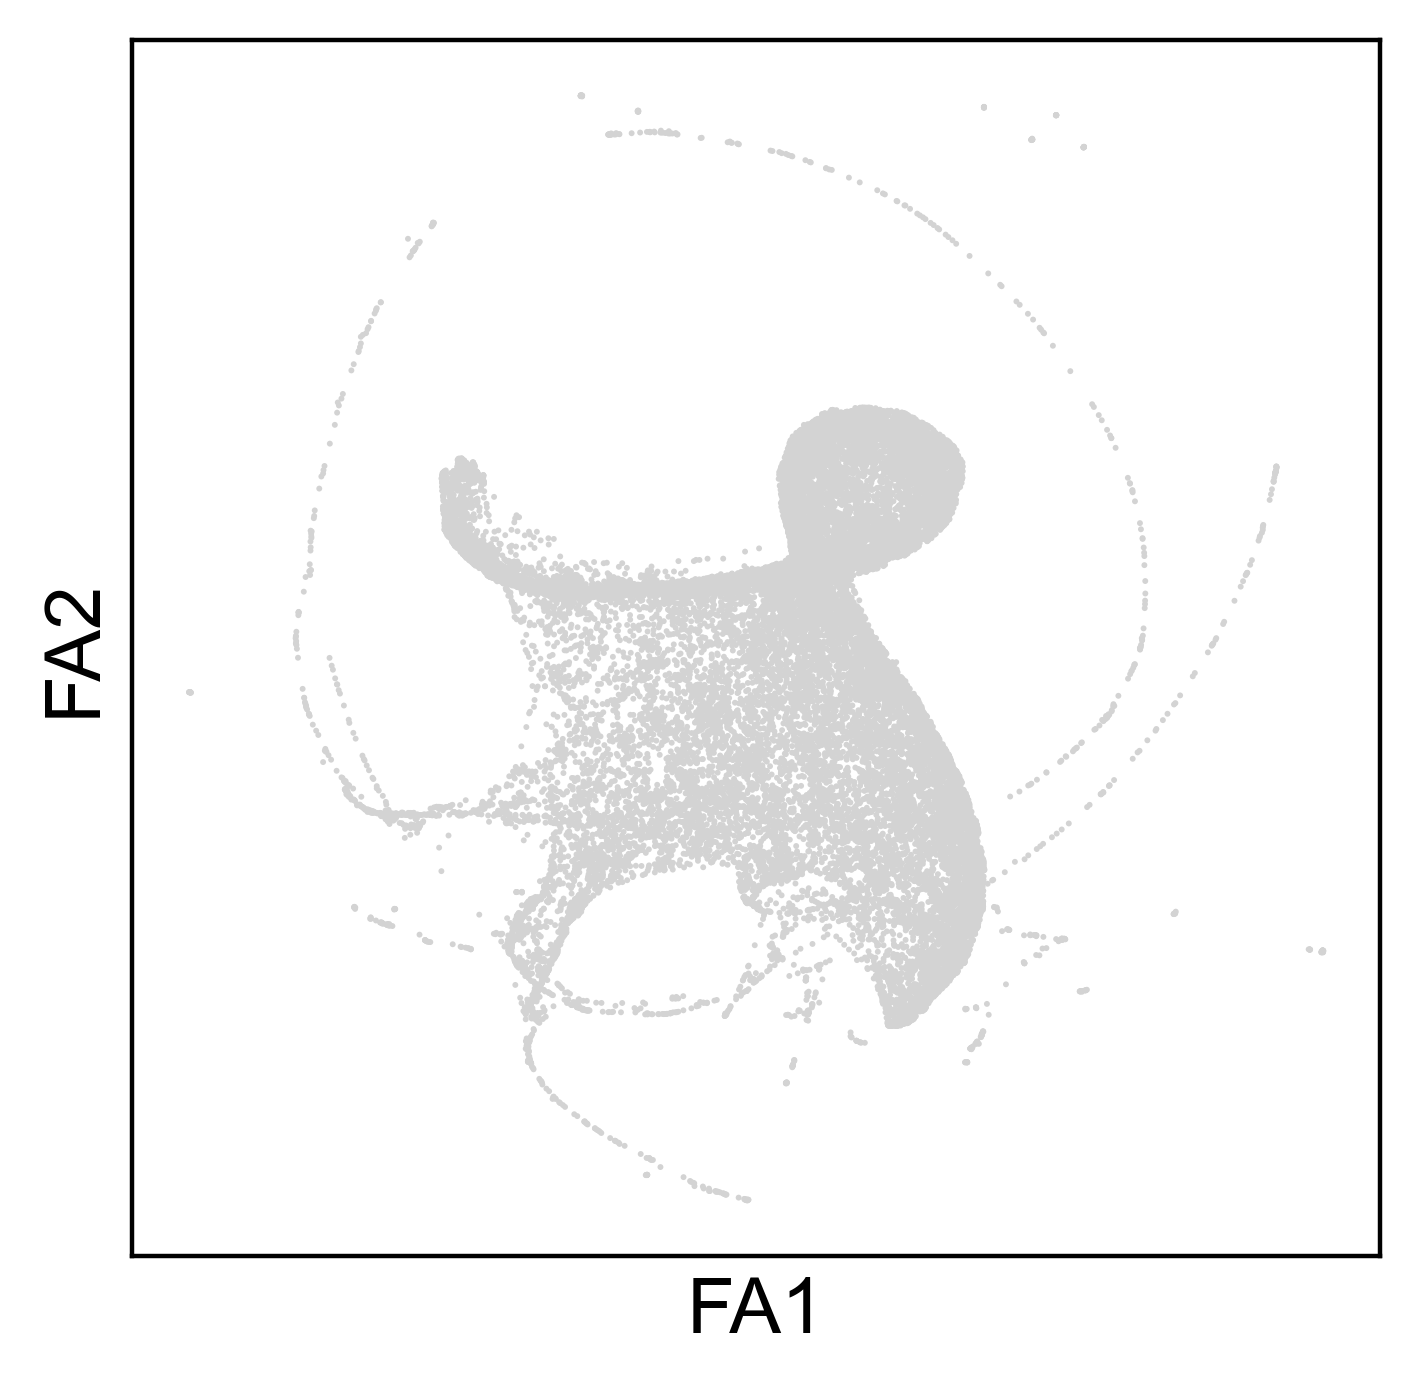

In [15]:
sc.pl.draw_graph(adata)

In [16]:
sc.tl.leiden(adata, resolution=1.0)

running Leiden clustering
    finished: found 52 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:07)


In [17]:
sc.tl.paga(adata, groups='leiden')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:03)


--> added 'pos', the PAGA positions (adata.uns['paga'])


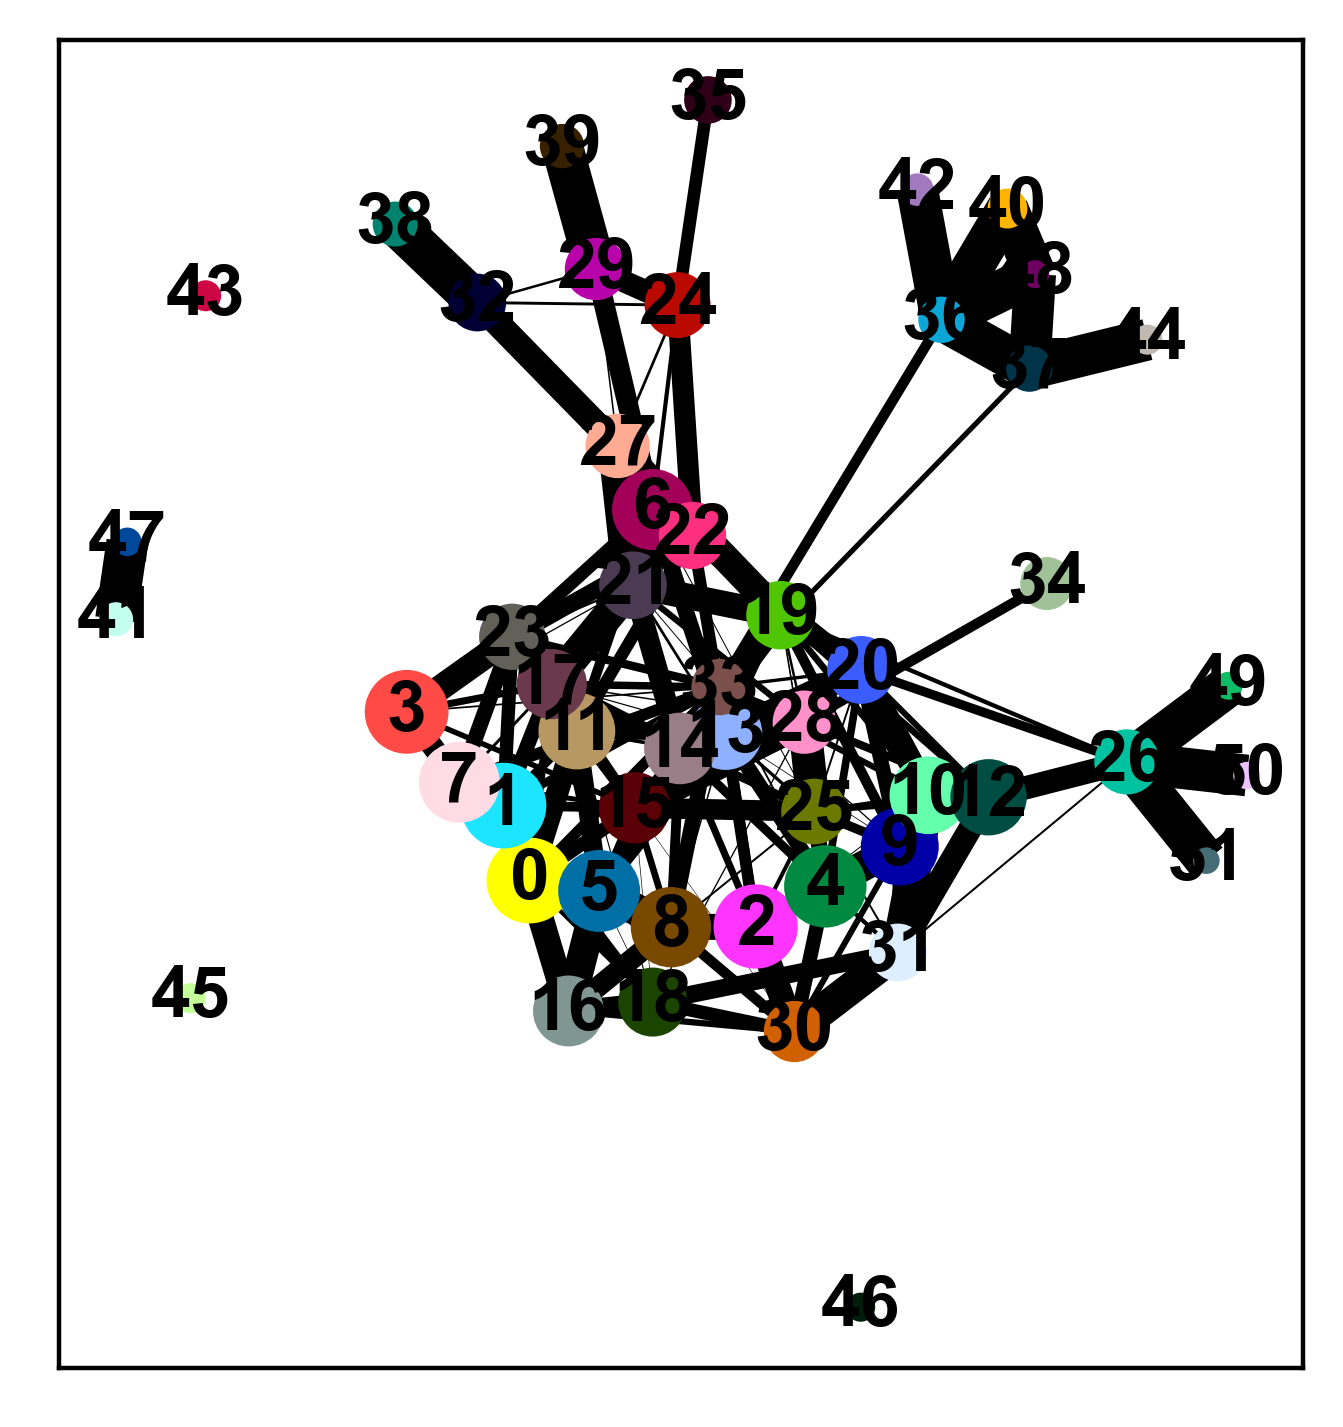

In [18]:
sc.pl.paga(adata)

In [22]:
adata.obs['leiden'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51'],
      dtype='object')

In [23]:
adata.obs['leiden_anno'] = adata.obs['leiden']

In [25]:
sc.tl.paga(adata, groups='leiden_anno')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:02)


--> added 'pos', the PAGA positions (adata.uns['paga'])


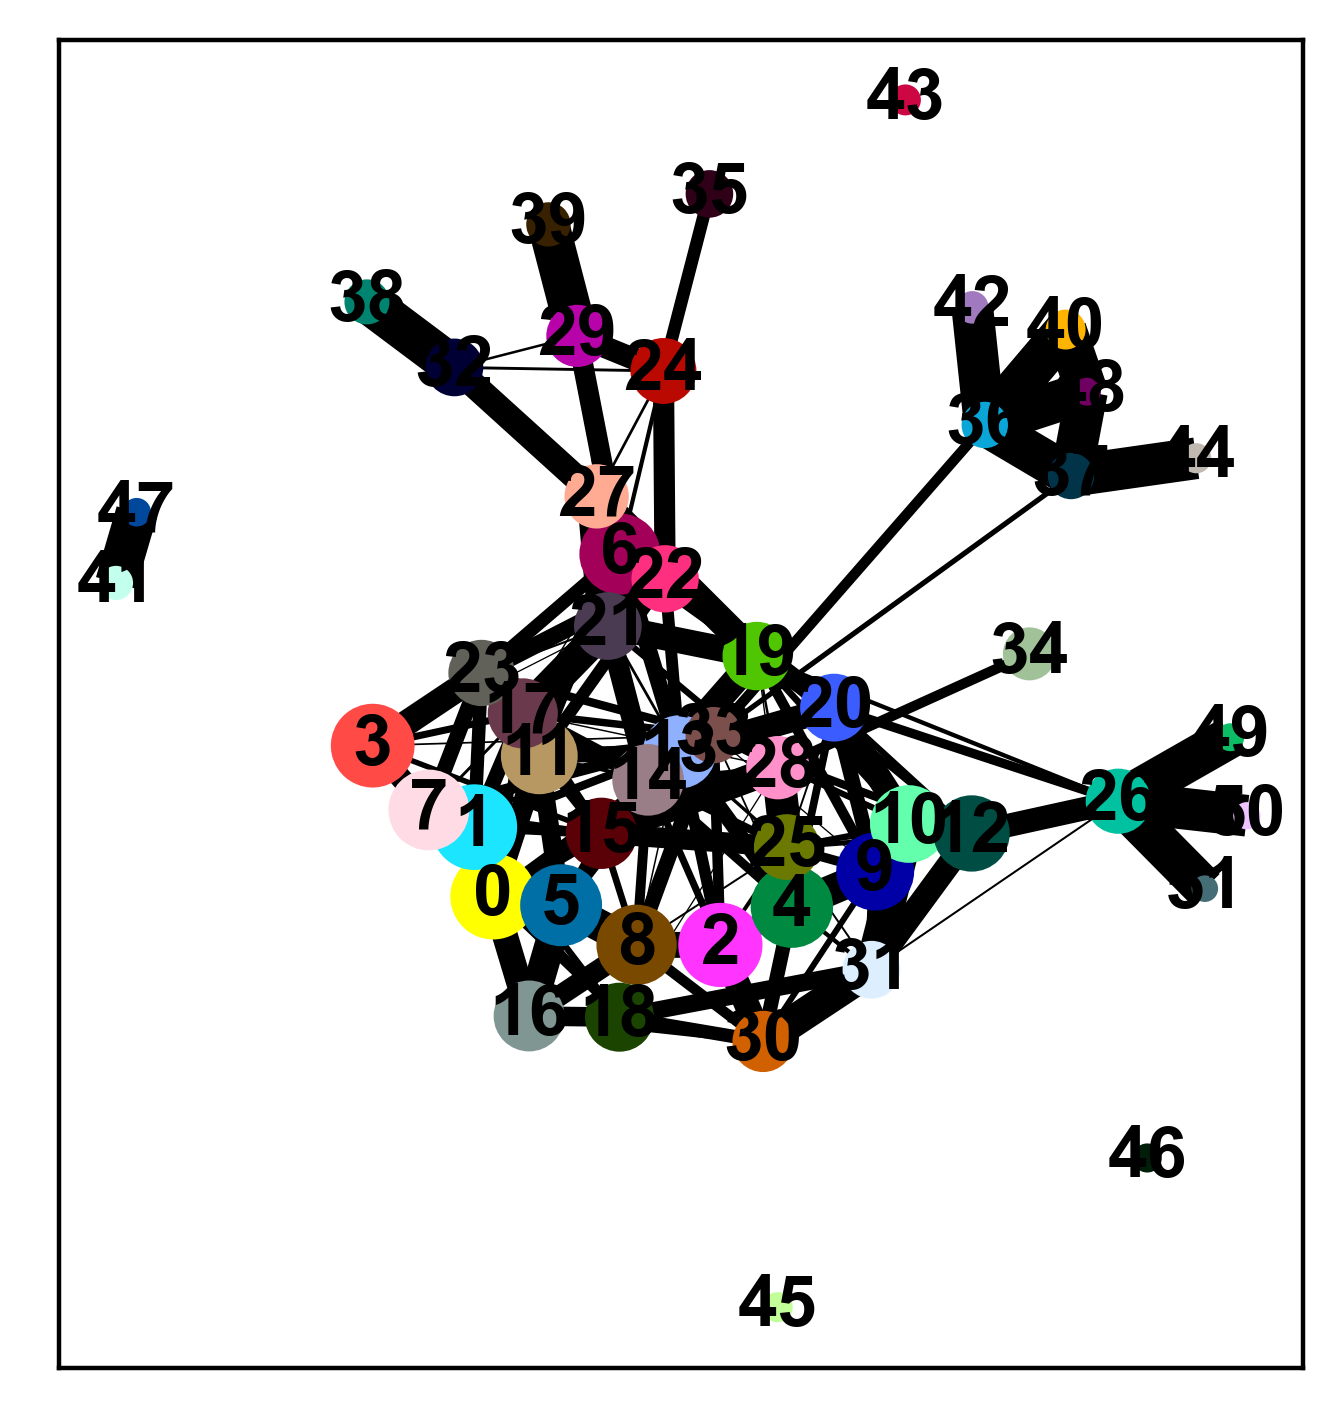

In [26]:
sc.pl.paga(adata, threshold=0.03, show=False)

In [27]:
sc.tl.draw_graph(adata, init_pos='paga')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:05:15)


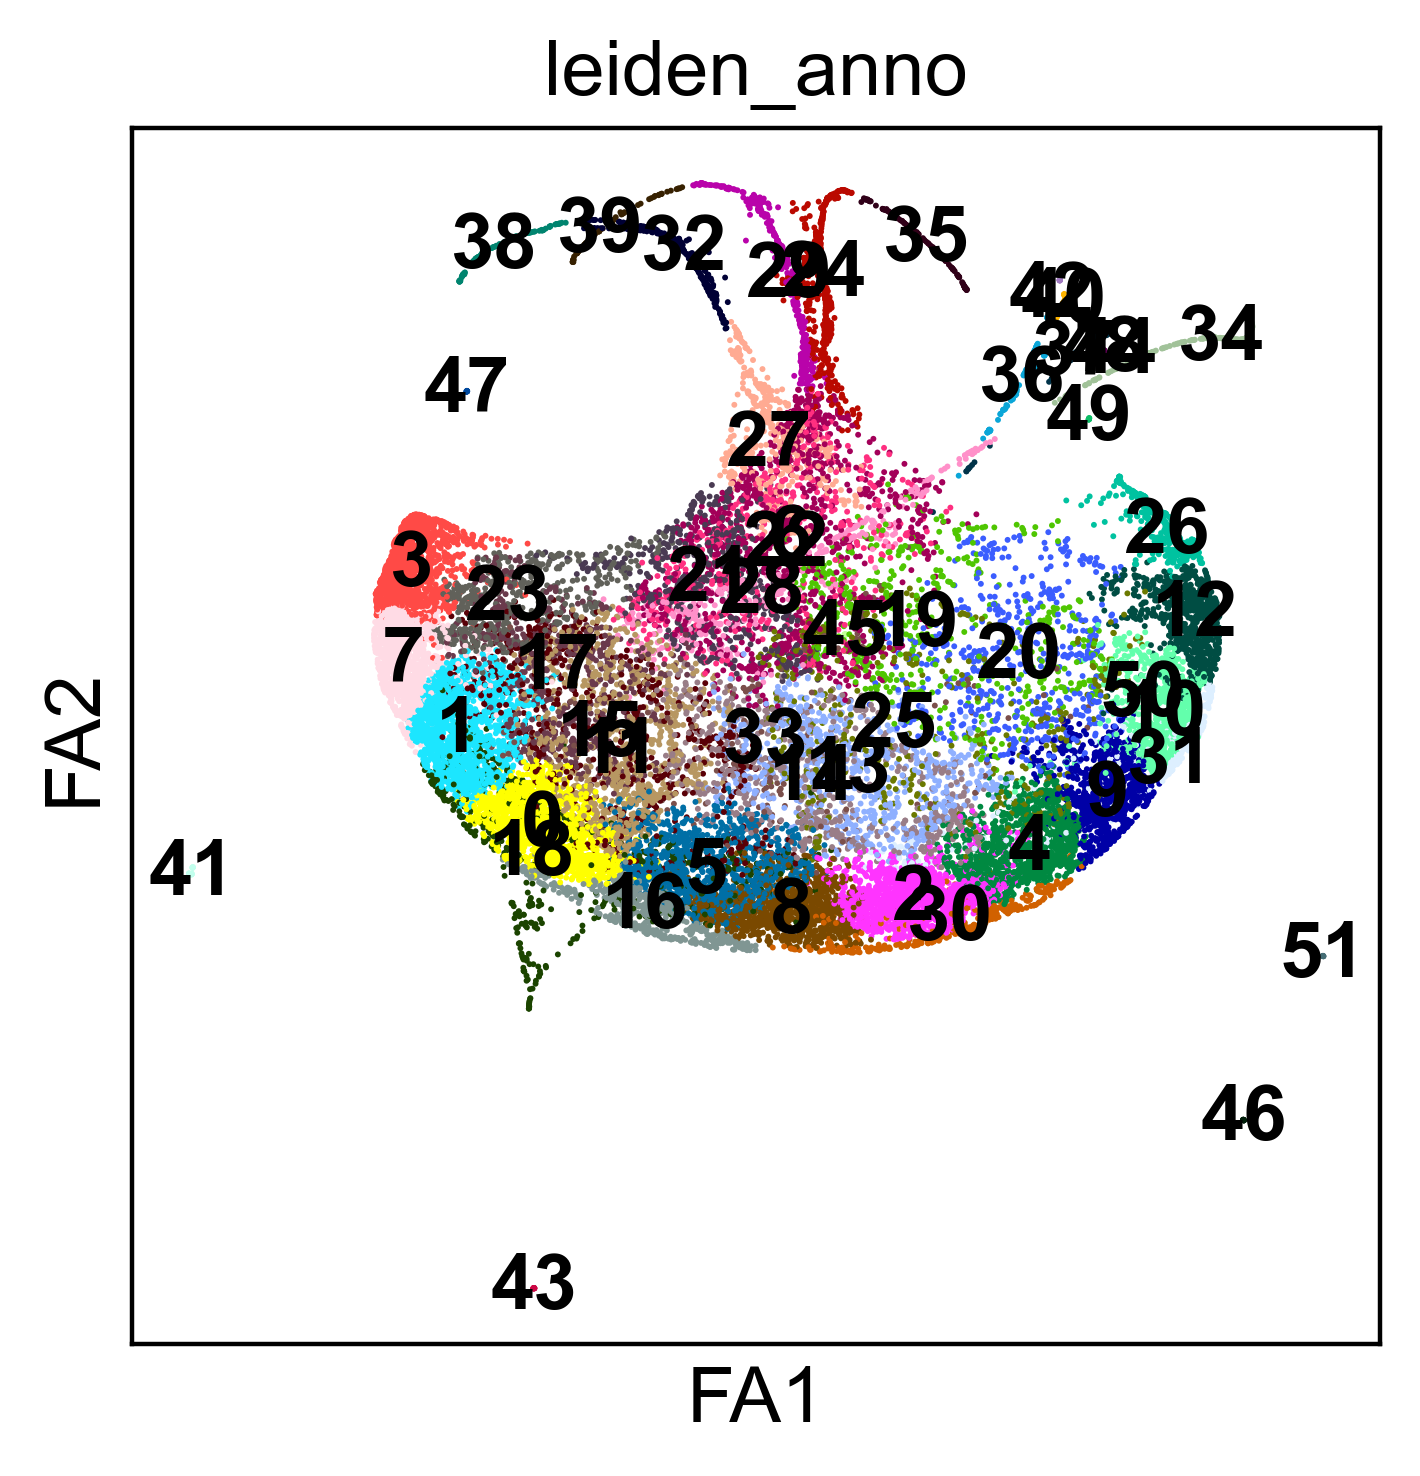

In [28]:
sc.pl.draw_graph(adata, color=['leiden_anno'], legend_loc='on data')

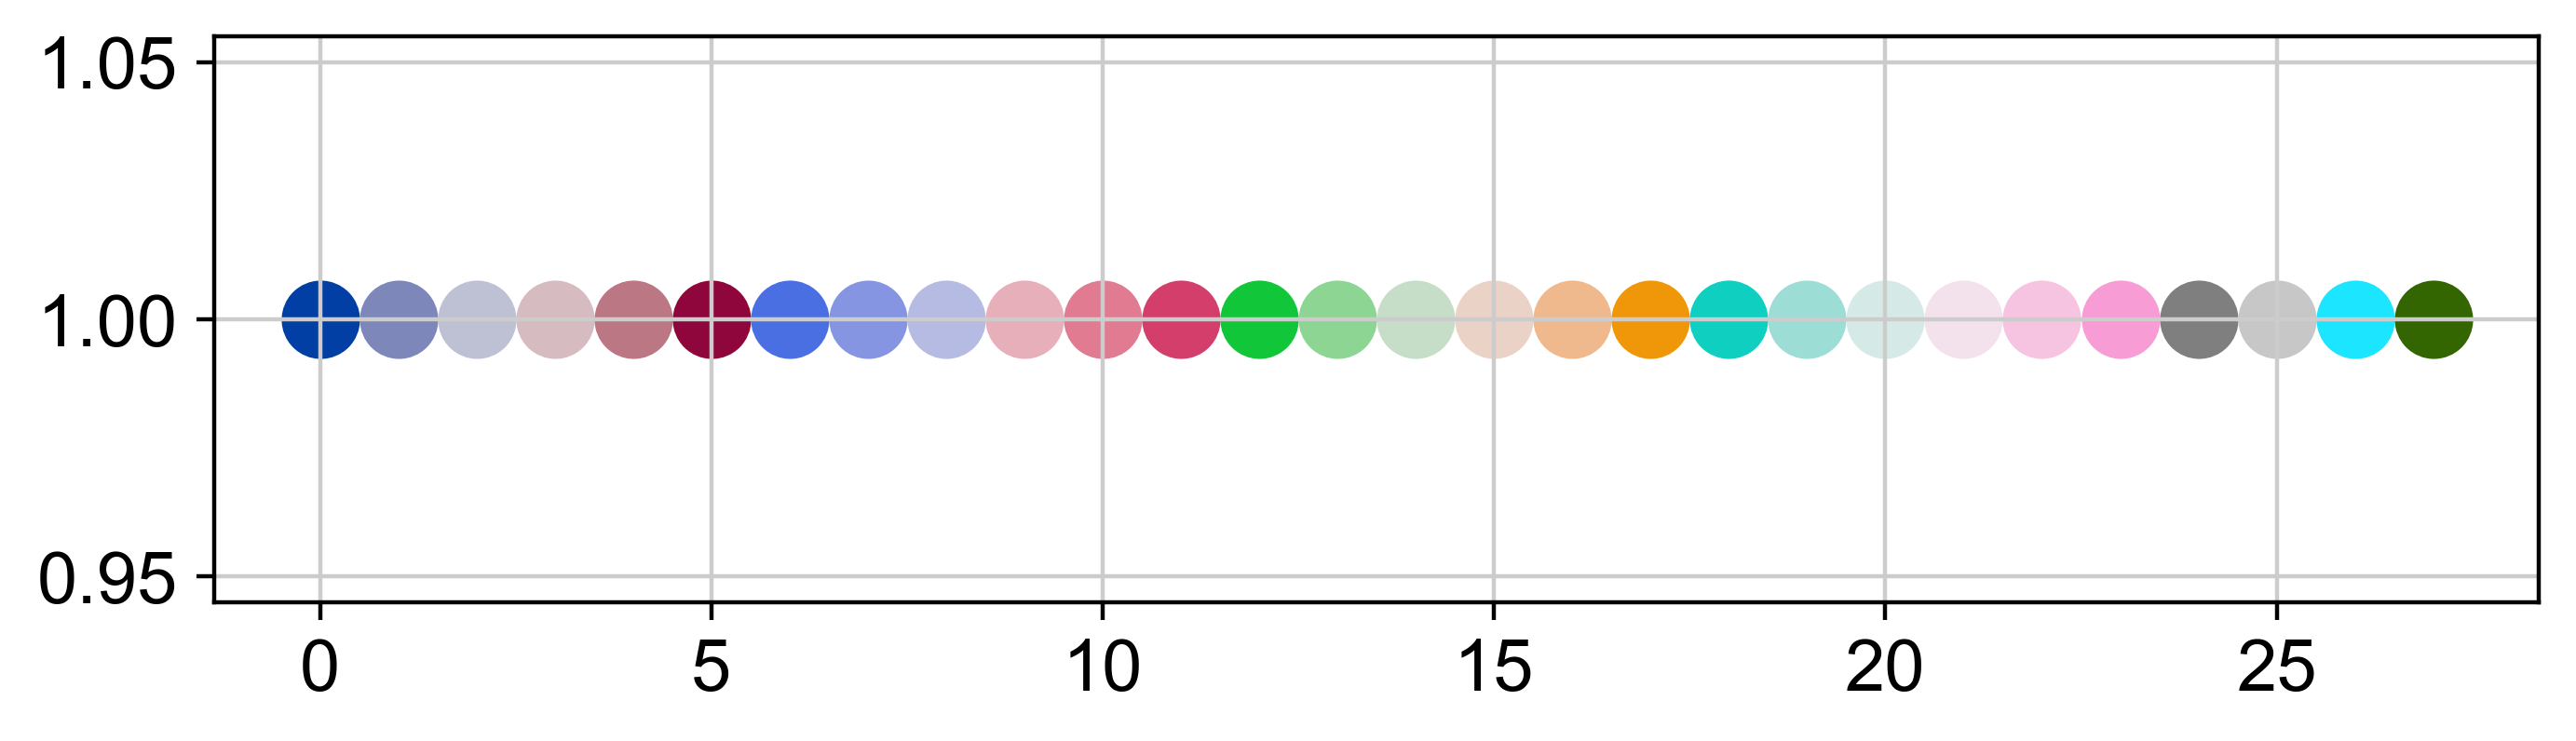

In [29]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()

In [30]:
sc.pp.log1p(adata)
sc.pp.scale(adata)
adata.raw = adata

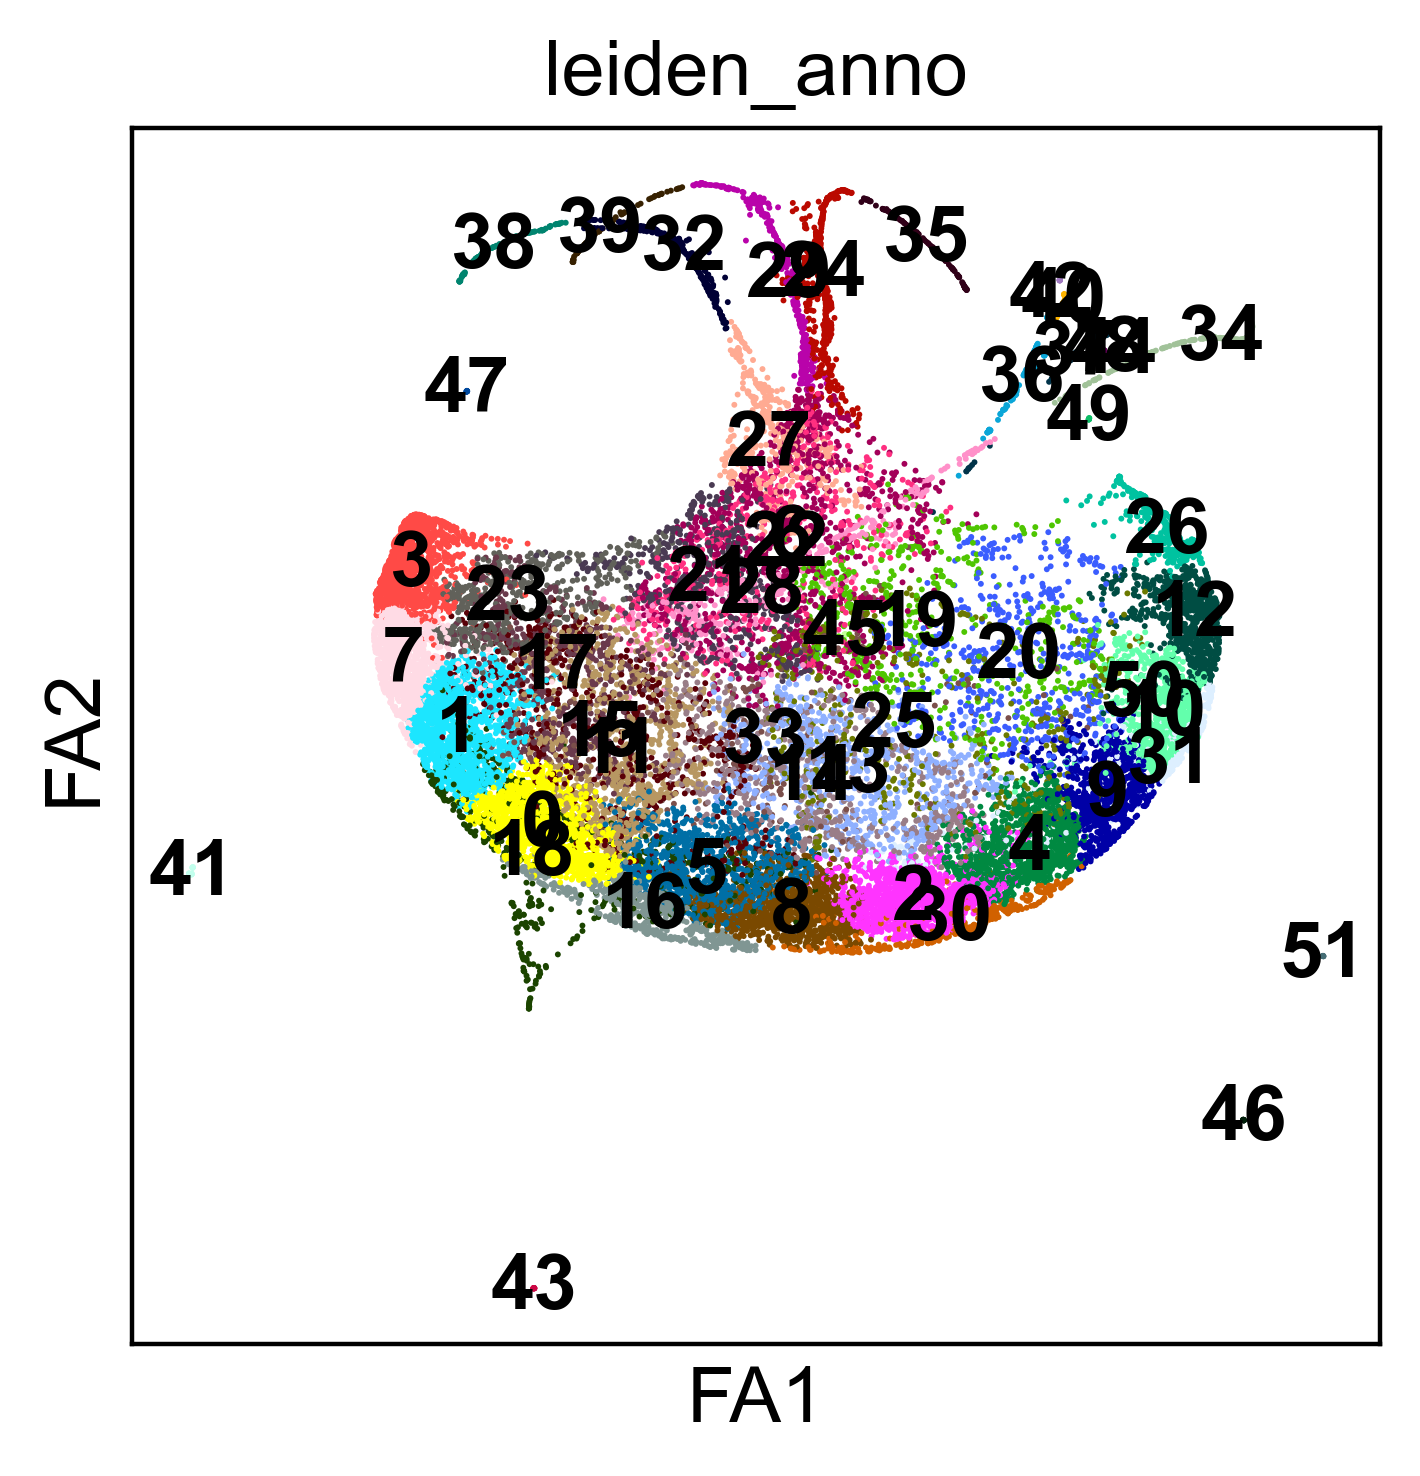

In [31]:
sc.pl.draw_graph(adata, color=['leiden_anno'], legend_loc='on data')